In [1]:
# Install the latest Tensorflow version.
!pip3 install --quiet "tensorflow>=1.7"
# Install TF-Hub.
!pip3 install --quiet tensorflow-hub
!pip3 install --quiet seaborn
!pip install seqeval[gpu]

     |████████████████████████████████| 377.0MB 87kB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7423 sha256=f73cf76c947fa052fa03b6abc3f0bb1038393127ba1525e94f0fb04da03c296d
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval


In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import seqeval

In [0]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [4]:
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

# Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(messages))

  for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))
    message_embedding_snippet = ", ".join(
        (str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [-0.016987260431051254, -0.008949851617217064, -0.007062714081257582, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.03531331196427345, -0.025384271517395973, -0.00788002461194992, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [0.018790990114212036, 0.04536517709493637, -0.02001088298857212, ...]



# Semantic Textual Similarity Task Example

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [0]:
def plot_similarity(labels, features, query, features_, rotation):
  corr = np.inner(features, features_)
  print(corr)
  
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=query,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(query, rotation=rotation)
  g.set_title("Semantic Textual Similarity")


def run_and_plot(session_, input_tensor_, messages_, query_, encoding_tensor):
  message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
  query_embedding_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: query_})
  
  plot_similarity(messages_, message_embeddings_, query_, query_embedding_, 0)

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

[[0.19922611]
 [0.26315638]
 [0.18792032]
 [0.87688756]
 [0.19545698]
 [0.34040582]
 [0.1994156 ]
 [0.13911594]
 [0.12741923]
 [0.13637568]
 [0.22647135]
 [0.23121487]
 [0.12758246]]


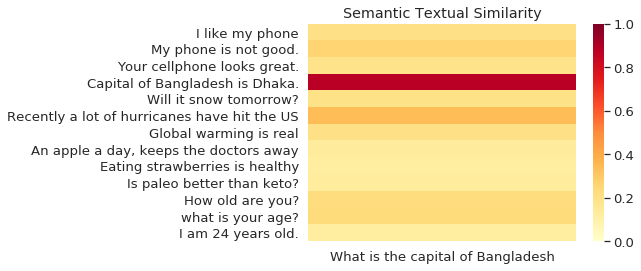

In [6]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",
       
    #other 
    "Capital of Bangladesh is Dhaka.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
    "I am 24 years old.",
    

   
]

query = [ "What is the capital of Bangladesh"]

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)

with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages, query,
               similarity_message_encodings)

# ChatBot

In [0]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]
embed = hub.Module(module_url)

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import codecs

path =  'gdrive/My Drive/DATA/test_question_bd.txt'
query = []

with codecs.open(path, 'r', 'utf-8') as f:
  for line in f:
    query.append(line.strip())
    
path =  'gdrive/My Drive/DATA/test_q_answers.txt'
true_answer_sentences = []

with codecs.open(path, 'r', 'utf-8') as f:
  for line in f:
    true_answer_sentences.append(line.strip())    

In [10]:
print(len(query))
print(len(true_answer_sentences))

60
60


In [0]:
path =  'gdrive/My Drive/DATA/hacathon.txt'
data = ""

with codecs.open(path, 'r', 'utf-8', errors='ignore') as f:
  for line in f:
    data+=line

In [12]:
import nltk
nltk.download('punkt')

messages = nltk.sent_tokenize(data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
len(messages)

48

## Find similarity

In [14]:
query_ = [query[20]]
query_

['Why does Bangladeshi people rarely smile']

In [0]:
similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)

session = tf.Session()
session.run(tf.global_variables_initializer())
session.run(tf.tables_initializer())

In [0]:
message_embeddings = session.run(
    similarity_message_encodings, feed_dict={similarity_input_placeholder: messages})
query_embedding = session.run(
    similarity_message_encodings, feed_dict={similarity_input_placeholder: query_})

corr = np.inner(query_embedding, message_embeddings)

In [17]:
corr.shape

(1, 48)

In [18]:
corr

array([[0.3690921 , 0.38352755, 0.37129456, 0.3834301 , 0.19822691,
        0.45775405, 0.33176357, 0.28146005, 0.14476039, 0.35817984,
        0.3495527 , 0.1204662 , 0.3938284 , 0.21869771, 0.32841685,
        0.2361705 , 0.20898888, 0.32996258, 0.03442037, 0.1673418 ,
        0.7195145 , 0.37762743, 0.36779284, 0.3034916 , 0.41420516,
        0.42709494, 0.35624725, 0.29137975, 0.39082682, 0.3357693 ,
        0.272005  , 0.24118432, 0.2780637 , 0.2602202 , 0.3463244 ,
        0.31718314, 0.34285307, 0.35450286, 0.21295074, 0.30173194,
        0.17671902, 0.33660403, 0.40708554, 0.27025524, 0.04908586,
        0.4011852 , 0.16910633, 0.13903745]], dtype=float32)

In [19]:
messages[corr[0].argmax()]

'The people of Bangladesh rarely smile because they consider frequent smiling to be a sign of immaturity.'

#### Find answer for all queries

In [20]:
message_embeddings = session.run(
    similarity_message_encodings, feed_dict={similarity_input_placeholder: messages})
query_embedding = session.run(
    similarity_message_encodings, feed_dict={similarity_input_placeholder: query})

corr = np.inner(query_embedding, message_embeddings)
session.close()

corr.shape

(60, 48)

In [21]:
answers = [messages[corr[i].argmax()] for i in range(corr.shape[0])]
len(answers)

60

In [22]:
for i in range(len(answers)):
  print(query[i])
  print(answers[i])
  print()

Tell us about Bangladesh
Bangladesh is one of the most disaster prone areas in the world.

Where is bangladesh situated
The capital of Bangladesh is Dhaka.

How does bangladesh ranks in the world
Bangladesh is a country in South Asia.

What is the population of bangladesh
Bangladesh is the world's 8th-most populous country with a population exceeding 162 million of people.

What is the size of the country
In area, it is the 92nd-largest country, spanning 147,570 square kilometers (56,980 sq mi).

What does the word “Bangladesh” means
The word Bangladesh means the people of Bengal in the local Bangla language.

What is the official name of Bangladesh
The country's official name is the Peoples Republic of Bangladesh.

How many season bangladesh have
Bangladesh has six seasons instead of four.

Tell the names of the seasons of bangladesh
Bangladesh has six seasons instead of four.

What is the Bay of Bengal
The Bay of Bengal, bounded by India, Bangladesh, Myanmar, Maldives, and Sri Lanka,

## Evaluation

In [23]:
sum([answers[i] == true_answer_sentences[i] for i in range(len(answers))])

45

In [0]:
y_pred = [nltk.word_tokenize(s) for s in answers]
y_true = [nltk.word_tokenize(s) for s in true_answer_sentences]

In [25]:
i, j = 0,20
y_true = y_true[i]
y_pred = y_pred[i]
print(y_true)
print(y_pred)

['Bangladesh', 'is', 'a', 'country', 'in', 'South', 'Asia', '.']
['Bangladesh', 'is', 'one', 'of', 'the', 'most', 'disaster', 'prone', 'areas', 'in', 'the', 'world', '.']


In [26]:
from seqeval.metrics import precision_score, recall_score, accuracy_score


print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

0.16666666666666666
0.2857142857142857
0.25


In [27]:
from nltk.translate import bleu_score
y_pred = [nltk.word_tokenize(s) for s in answers]
y_true = [nltk.word_tokenize(s) for s in true_answer_sentences]
print(len(y_pred))
print(len(y_true))

60
60


In [28]:
bleu_score.corpus_bleu(y_true, y_pred)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.6012638755248773

This losses are for NER. And not applicable in this context

## Evaluation for different model

In [48]:
module_urls = ["https://tfhub.dev/google/universal-sentence-encoder-lite/1","https://tfhub.dev/google/universal-sentence-encoder-lite/2", "https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

for model_url in module_urls:
  embed = hub.Module(module_url)
  
  similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
  similarity_message_encodings = embed(similarity_input_placeholder)

  session = tf.Session()
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  
  
  message_embeddings = session.run(
    similarity_message_encodings, feed_dict={similarity_input_placeholder: messages})
  query_embedding = session.run(
      similarity_message_encodings, feed_dict={similarity_input_placeholder: query})

  corr = np.inner(query_embedding, message_embeddings)
  session.close()
  
  answers = [messages[corr[i].argmax()] for i in range(corr.shape[0])]
  print(sum([answers[i] == true_answer_sentences[i] for i in range(len(answers))]))
  
  y_pred = [nltk.word_tokenize(s) for s in answers]
  print(bleu_score.corpus_bleu(y_true, y_pred))

45
0.6012638755248773


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


45
0.6012638755248773
45
0.6012638755248773
45
0.6012638755248773


# Other previous approaches

In [0]:
def print_question_response(responses):
  for i in range(len(query)):
    print(query[i])
    print(responses[i])
    print()

In [0]:
def calculate_accuracy_and_bleu(responses):
  correct = 0
  for i in range(len(query)):
    if responses[i] == true_answer_sentences[i]:
      correct += 1
  print(correct/len(query))
  
  y_pred = [nltk.word_tokenize(s) for s in responses]
  print(bleu_score.corpus_bleu(y_true, y_pred))

## jaccard Similarity


In [0]:
def jaccard_similarity(query, document):
    query = query.lower()
    document = document.lower()
    
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

In [0]:
def find_best_answer_with_jaccard_similarity(question):
    sim_ = -1
    answer = None
    for response in messages:
        sim = jaccard_similarity(question, response)
        if sim > sim_:
            sim_ = sim
            answer = response
    return answer           

In [43]:
find_best_answer_with_jaccard_similarity("what is bangladesh")

'Bangladesh has the worlds largest river and the worlds largest mangrove.'

In [0]:
answers = []
for q in query:
  answers.append(find_best_answer_with_jaccard_similarity(q))
print_question_response(answers)

In [59]:
calculate_accuracy_and_bleu(answers)

0.11666666666666667
0.5790814738322342


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


## CountVectorizer Cosine Similarity

In [0]:
def cosine_distance_countvectorizer_method(s1, s2):
    
    # sentences to list
    allsentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    # print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return cosine

In [0]:
def find_best_answer_with_countvectorizer(question):
    sim_ = -1
    answer = None
    for response in messages:
        sim = cosine_distance_countvectorizer_method(question, response)
        if sim > sim_:
            sim_ = sim
            answer = response
    return answer     

In [73]:
find_best_answer_with_countvectorizer("Which is the national tree of bangladesh")

'It has grismo (summer), barsha (rainy season), sharat (autumn), hemanto (cool season), sheet (winter), and bashonto (spring).'

In [105]:
answers = []
for q in query:
  answers.append(find_best_answer_with_countvectorizer(q))
print_question_response(answers)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Tell us about Bangladesh
Bangladesh is a country in South Asia.

Where is bangladesh situated
The Bay of Bengal, bounded by India, Bangladesh, Myanmar, Maldives, and Sri Lanka, is the biggest bay in the world.

How does bangladesh ranks in the world
Bangladesh has the third largest Muslim population in the world after Indonesia and Pakistan.

What is the population of bangladesh
30% of the Bangladesh population live below the poverty line.

What is the size of the country
However, the country's overall standard of living has been improving.

What does the word “Bangladesh” means
The word Bangladesh means the people of Bengal in the local Bangla language.

What is the official name of Bangladesh
The country's official name is the Peoples Republic of Bangladesh.

How many season bangladesh have
Bangladesh has six seasons instead of four.

Tell the names of the seasons of bangladesh
Bangladesh has six seasons instead of four.

What is the Bay of Bengal
Bangladesh has the worlds largest ri

In [75]:
calculate_accuracy_and_bleu(answers)

0.016666666666666666
0.5415082421846514


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


## GLoVE 50d


In [76]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-08-28 05:54:13--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-08-28 05:54:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-08-28 05:54:14--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [78]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [116]:
gloveFile = "glove.6B.50d.txt"


import numpy as np

def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel(gloveFile)



Loading Glove Model
Done. 400000  words loaded!


In [117]:
"he" in model

True

In [118]:
import re
from nltk.corpus import stopwords
import pandas as pd
import nltk
nltk.download('stopwords')

def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([model[word] for word in preprocess(s1) if word in model],axis=0)
    vector_2 = np.mean([model[word] for word in preprocess(s2) if word in model],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    # print('Word Embedding method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')
    return round((1-cosine)*100,2)

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    # ax_red = sns.heatmap(df)
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def find_best_answer_with_embedding(question):
    sim_ = -1
    answer = None
    for response in messages:
        sim = cosine_distance_wordembedding_method(question, response)
        if sim > sim_:
            sim_ = sim
            answer = response
    return answer 

In [120]:
find_best_answer_with_embedding("Which is the national tree of bangladesh")

'The national animal of Bangladesh is the Royal bengal tiger.'

In [121]:
answers = []
for q in query:
  answers.append(find_best_answer_with_embedding(q))
print_question_response(answers)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Tell us about Bangladesh
Bangladesh is a country in South Asia.

Where is bangladesh situated
The Bay of Bengal, bounded by India, Bangladesh, Myanmar, Maldives, and Sri Lanka, is the biggest bay in the world.

How does bangladesh ranks in the world
Bangladesh has the third largest Muslim population in the world after Indonesia and Pakistan.

What is the population of bangladesh
30% of the Bangladesh population live below the poverty line.

What is the size of the country
However, the country's overall standard of living has been improving.

What does the word “Bangladesh” means
The word Bangladesh means the people of Bengal in the local Bangla language.

What is the official name of Bangladesh
The country's official name is the Peoples Republic of Bangladesh.

How many season bangladesh have
Bangladesh has six seasons instead of four.

Tell the names of the seasons of bangladesh
Bangladesh has six seasons instead of four.

What is the Bay of Bengal
Bangladesh has the worlds largest ri

In [122]:
answers = [str(a) for a in answers]
calculate_accuracy_and_bleu(answers)

0.5666666666666667
0.5910149593602474


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


## GLoVE 300d

In [125]:
gloveFile = "glove.6B.300d.txt"
model = loadGloveModel(gloveFile)

Loading Glove Model
Done. 400000  words loaded!


In [126]:
answers = []
for q in query:
  answers.append(find_best_answer_with_embedding(q))
print_question_response(answers)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Tell us about Bangladesh
Bangladesh is a country in South Asia.

Where is bangladesh situated
The Bay of Bengal, bounded by India, Bangladesh, Myanmar, Maldives, and Sri Lanka, is the biggest bay in the world.

How does bangladesh ranks in the world
Bangladesh has the third largest Muslim population in the world after Indonesia and Pakistan.

What is the population of bangladesh
30% of the Bangladesh population live below the poverty line.

What is the size of the country
However, the country's overall standard of living has been improving.

What does the word “Bangladesh” means
The word Bangladesh means the people of Bengal in the local Bangla language.

What is the official name of Bangladesh
The country's official name is the Peoples Republic of Bangladesh.

How many season bangladesh have
Bangladesh has six seasons instead of four.

Tell the names of the seasons of bangladesh
Bangladesh has six seasons instead of four.

What is the Bay of Bengal
The Bay of Bengal, bounded by India,

In [127]:
answers = [str(a) for a in answers]
calculate_accuracy_and_bleu(answers)

0.7166666666666667
0.5889555100189485


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
